# Bagging 

Dans ce TP nous allons utiliser la base de données digits, qui contient 10 classes 
(images des chiffres en écriture manuscrite). Il y a 1797 éléments, chaque élément a 64 
attributs (8 pixels par 8)

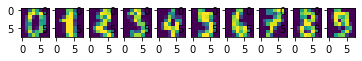

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
 fig.add_subplot(1,10,i+1)
 plt.imshow(digit)
plt.show()

In [31]:
print("\n le nombre d'élément est",len(digits.data))
print("\n le nombre d'attribut est",len(digits.feature_names))
print("\n le nombre de classe est ",len(digits.target))


 le nombre d'élément est 1797

 le nombre d'attribut est 64

 le nombre de classe est  1797


nous allons utiliser comme classifieur de base un arbre de 
décision DecisionTreeClassifier

In [6]:
from sklearn.model_selection import train_test_split
# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

In [ ]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.6495673671199012


**Question :Construire la variance de la valeur accuracy sur 100 tirages pour la séparation
apprentissage/test. Que pouvons-nous conclure ?**


In [ ]:
import numpy as np 
L=[]
for i in range (100):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
  clf = tree.DecisionTreeClassifier()
  clf.fit(X_train, y_train)
  Z = clf.predict(X_test)
  accuracy = clf.score(X_test,y_test)
  L.append(accuracy)
X=np.array(L)
print("standard diviation{}".format(X.std()))

standard diviation0.028461446213912913


l'ecart type est l'orde de 2% , on peut conclure que l'accuracy varie d'une facon significative d'une prediction à une autre  

**Question :
Calculer la variance de la valeur accuracy sur 100 tirages pour la séparation apprentissage/test.
Comparer avec la variance du classifieur de base. Que pouvons-nous conclure ?**

In [ ]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(tree.DecisionTreeClassifier(),
max_samples=0.5, max_features=0.5, n_estimators=200)

In [ ]:
L=[]
for i in range (100):
  clf.fit(X_train, y_train)
  Z = clf.predict(X_test)
  accuracy=clf.score(X_test,y_test)
  L.append(accuracy)
X=np.array(L)
print("standard diviation{}".format(X.std()))

standard diviation0.0039980474041083


La methode de bagging a réussit à réduire la variation l'accuracy d'une prediction à une autre.Cela vient du fait que le bagging  construit plusieurs instances d’un estimateur et ensuite combine les prédictions 
individuelles en réalisant leur moyenne 

**Question :
Construire le graphique accuracy vs n_estimators. Que constatez-vous ?**

In [ ]:
L_estimator=[]
L_accu=[]
for i in range (2,500,20):
  clf = BaggingClassifier(tree.DecisionTreeClassifier(),
  max_samples=0.5, max_features=0.5, n_estimators=i)  
  clf.fit(X_train, y_train)
  Z = clf.predict(X_test)
  accuracy=clf.score(X_test,y_test)
  L_estimator.append(i)
  L_accu.append(accuracy)



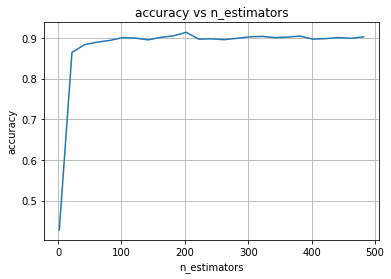

In [ ]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
ax.plot(L_estimator, L_accu)

ax.set(xlabel='n_estimators', ylabel='accuracy',
       title='accuracy vs n_estimators')
ax.grid()

la valeur d'accuracy augmente avec le n_estimators , à partir de n_estimators=100 elle commence à etre stable

**Question :
Faites varier les parametres max_samples et max_features. Pour quelles valeurs on obtient le 
meilleur résultat ? On pourra notamment utiliser GridSearchCV pour réaliser une recherche 
systématique.**

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree 
tree_para = {'criterion':['gini'],'max_leaf_nodes':[10,15,20,25,30,35,40],'max_features':[10,11,12,15,20,30,40,50,70]}
clf = GridSearchCV(tree.DecisionTreeClassifier(), tree_para, cv=2)
clf.fit(X_train,y_train)
print("\n The best estimator :",clf.best_estimator_)
print("\n the best score : ",clf.best_score_)


 The best estimator : DecisionTreeClassifier(max_features=40, max_leaf_nodes=35)

 the best score :  0.6260923845193509


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
14 fits failed out of a total of 126.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, 

D'aprés GridSearchCV  pour max_features=40 et  max_leaf_nodes=35 on obtient le meilleur score qui est de l'ordre 0.6260923845193509

# Forêts aléatoires

Par la suite nous allons refaire la classification sur la base Digits en utilisant un 
classifieur RandomForestClassifier. Comme d’habitude, on sépare les données en gardant 10% 
pour l’apprentissage et 90% pour le test.

In [35]:
digits = load_digits()
X, y = digits.data, digits.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.90)

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.9060568603213844


**Question :
Comment la valeur de la variable accuracy se compare avec le cas bagging qui utilise le même 
nombre d’arbres (200 dans notre cas) ?**

Bagging avec un même nombre d’arbres égal à 200 

In [38]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(tree.DecisionTreeClassifier(),
max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)
accuracy

0.8974042027194067

On constate que l’algorithme des forêts aléatoires  et bagging retournent  presque la meme valeur de l 'accuracy (0.9 et 0.89) pour un même nombre d’arbres égal à 200. Cela vient du fait que l'algorithme des forêts aléatoires utilise le même principe que le bagging, mais avec une étape supplémentaire de randomisation dans 
la sélection des attributs des nœuds

**Question :
Construire la variance de la valeur accuracy sur 100 tirages pour la séparation 
apprentissage/test. Que pouvons-nous conclure en comparant avec la séction précedente 
(bagging) ?**

In [39]:
clf = RandomForestClassifier(n_estimators=200)

In [41]:
import numpy as np 
L=[]
for i in range (100):
  clf.fit(X_train, y_train)
  Z = clf.predict(X_test)
  accuracy=clf.score(X_test,y_test)
  L.append(accuracy)
X=np.array(L)
print("standard diviation{}".format(X.std()))

standard diviation0.004188224841580859


Tout comme le bagging, dans  l'algorithme des forets aléatoire la valeur de l'accuracy est presque la meme d'une prediction à une autre (les valeurs de l'ecart type sont respectivement de l'orde de 0.003 et 0.004 )

**Question :
Construire le graphique accuracy vs n_estimators. Que constatez-vous ? A partir de quelle valeur 
on n’améliore plus ?**

In [42]:
L_estimator=[]
L_accu=[]
for i in range (2,500,20):
  clf = RandomForestClassifier(n_estimators=i)
  clf.fit(X_train, y_train)
  Z = clf.predict(X_test)
  accuracy=clf.score(X_test,y_test)
  L_estimator.append(i)
  L_accu.append(accuracy)

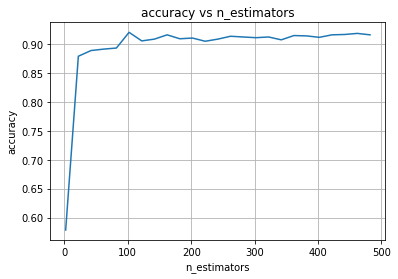

In [43]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
ax.plot(L_estimator, L_accu)

ax.set(xlabel='n_estimators', ylabel='accuracy',
       title='accuracy vs n_estimators')
ax.grid()

la valeur d'accuracy augmente avec le n_estimators , à partir de n_estimators=180 elle commence à etre stable

**Question :
Regardez dans la documentation les ExtraTreesClassifier et refaites la classification avec ce 
type de classifieur. Comparez avec RandomForestClassifier.**

Extra Trees est une méthode d'apprentissage ensembliste qui ressemble à Random Forest, en ce sens qu'il construit plusieurs arbres et divise les nœuds en utilisant des sous-ensembles aléatoires de caractéristiques, mais avec deux différences essentielles : il n'effectue pas de bootstrap des observations (ce qui signifie qu'il échantillonne sans remplacement), et les nœuds sont divisés sur des divisions aléatoires, et non sur les meilleures divisions.



In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
tree_para = {'criterion':['gini'],'n_estimators':[50,100,150,200,250]}
clf = GridSearchCV(RandomForestClassifier(), tree_para, cv=2)
clf.fit(X_train,y_train)
print("\n The best estimator :",clf.best_estimator_)
print("\n the best score : ",clf.best_score_)


 The best estimator : RandomForestClassifier(n_estimators=200)

 the best score :  0.8435081148564294


In [86]:
start_time = time.time()
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)
end_time = time.time()
print("\n accuracy de extremely randomized trees classifier est:{}".format(accuracy))
print("\n Temps d'execution est:{} s".format(end_time-start_time))


 accuracy de extremely randomized trees classifier est:0.9110012360939431

 Temps d'execution est:0.4742929935455322 s


In [87]:
from sklearn.ensemble import ExtraTreesClassifier
tree_para = {'criterion':['gini'],'n_estimators':[50,100,150,200,250]}
clf = GridSearchCV(ExtraTreesClassifier(), tree_para, cv=2)
clf.fit(X_train,y_train)
print("\n The best estimator :",clf.best_estimator_)
print("\n the best score : ",clf.best_score_)


 The best estimator : ExtraTreesClassifier(n_estimators=150)

 the best score :  0.8712234706616729


In [88]:
import time
start_time = time.time()
extra_tree_forest = ExtraTreesClassifier(n_estimators = 150)
extra_tree_forest.fit(X_train, y_train)
Z = extra_tree_forest.predict(X_test)
accuracy=extra_tree_forest.score(X_test,y_test)
end_time = time.time()
print("\n accuracy de extremely randomized trees classifier est:{}".format(accuracy))
print("\n Temps d'execution est:{} s".format(end_time-start_time))




 accuracy de extremely randomized trees classifier est:0.9276885043263288

 Temps d'execution est:0.2982327938079834 s


 les résultats obtenus sont pratiquement les mêmes pour les deux algorithmes(0.91  accuracy pour randomforestclassifier et 0.92 accuracy pour extratreesclassifier). Il est intéressant de noter la différence dans le temps d'exécution, où l'Extra Trees est beaucoup plus rapide(0.47s pour randomforestclassifier et 0.29 pour extratressclasifier)

# Boosting

Dans la suite nous allons refaire la classification sur la base Digits en utilisant Le principe du boosting avec  les DecisionTreeClassifier

In [89]:
from sklearn.ensemble import AdaBoostClassifier
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
# AdaBoost basé sur 200 arbres de décision
clf =AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5),
n_estimators=200, learning_rate=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9079110012360939


**Question :
Le paramètre max_depth contrôle la profondeur de l’arbre. Essayez plusieurs valeurs pour voir 
l’impact de l’utilisation d’un classifieur faible vs plus fort (max_depth élevé ou éliminer le 
paramètre). Testez aussi l’effet du paramètre learning_rate et le nombre de classifieurs**

l’impact de max depth 

In [96]:
L_estimator=[]
L_accu=[]
for i in range (5,50,5):
  clf =AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=i),
  n_estimators=200, learning_rate=2)
  clf.fit(X_train, y_train)
  accuracy = clf.score(X_test, y_test)
  L_estimator.append(i)
  L_accu.append(accuracy)

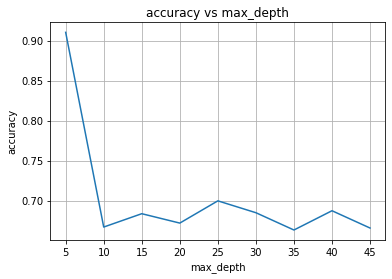

In [97]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
ax.plot(L_estimator, L_accu)

ax.set(xlabel='max_depth', ylabel='accuracy',
       title='accuracy vs max_depth')
ax.grid()

la valeur optimal  max_depth est de l'odre de 5 qui donne une accuracy de 0.9  . Pour des valeurs de max_depth elevées l'algorithme commence à sur-apprendre d'ou la valeur de l'accuracy se décgrade

l’impact de n_estimators

In [98]:
L_estimator=[]
L_accu=[]
for i in range (50,500,50):
  clf =AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5),
  n_estimators=i, learning_rate=2)
  clf.fit(X_train, y_train)
  accuracy = clf.score(X_test, y_test)
  L_estimator.append(i)
  L_accu.append(accuracy)

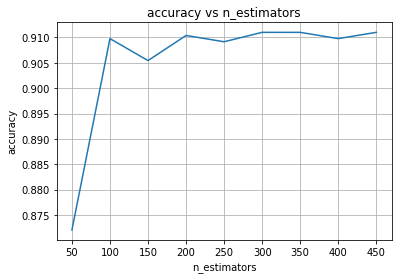

In [99]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()
ax.plot(L_estimator, L_accu)

ax.set(xlabel='n_estimators', ylabel='accuracy',
       title='accuracy vs n_estimators')
ax.grid()

l'accuracy augmente au fur et à mesure avec les n_estimators. Pour n_estimators=100 elle commence à etre stable 